In [1]:
import numpy as np

# Principal Component Analysis (PCA): The Matrix Story 📊

## What is PCA, Really? 🤔

**Imagine you're looking at a cloud of data points from different angles.** Some angles reveal more structure than others. PCA finds the **best viewing angles** - the directions where data varies the most.

**In mathematical terms:** PCA finds the principal axes of variation in your data using **eigenvalues and eigenvectors** of the covariance matrix.

## 🎯 Learning Objectives

By the end of this notebook, you'll understand:

1. **🔍 What PCA does geometrically** - finding principal directions
2. **🧮 How matrices and vectors power PCA** - covariance, eigendecomposition  
3. **📐 Step-by-step PCA computation** - from raw data to principal components
4. **📊 Real example walkthrough** - student test scores analysis
5. **🎨 Visual interpretation** - seeing the transformation in action

## 💡 The Big Picture

**PCA = Finding the coordinate system where your data looks simplest**

- **Original coordinates**: Might have complex relationships
- **Principal coordinates**: Data aligned with main variation directions
- **Matrix magic**: Eigendecomposition reveals these special directions

Let's dive in! 🚀

In [2]:
# Essential imports for PCA analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import pandas as pd

# Set up beautiful plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

print("🔬 PCA Laboratory Setup Complete!")
print("📊 All tools ready for matrix analysis")

🔬 PCA Laboratory Setup Complete!
📊 All tools ready for matrix analysis


## 📚 Concrete Example: Student Test Scores

**Our Scenario:** We have 50 students who took tests in **Math** and **Physics**. Generally, students good at math tend to be good at physics too (positive correlation).

**Our Goal:** Use PCA to find:
1. The **main direction** of academic ability (1st principal component)
2. The **secondary direction** of specialized skills (2nd principal component)

**Why this matters:** PCA will reveal the underlying structure in academic performance!

📊 STUDENT TEST SCORES DATASET
Dataset shape: (50, 2) (students × subjects)
Subjects: Math, Physics

First 10 students:
          Math  Physics
Student                
0         85.0     51.8
1         69.8     54.1
2         79.3     64.3
3        102.7     70.3
4         79.7     55.6
5         78.9     61.2
6         92.0     97.8
7         84.0     71.0
8         70.6     56.9
9         90.9     65.8

📈 BASIC STATISTICS:
Math    - Mean: 71.8, Std: 16.2
Physics - Mean: 56.9, Std: 14.0
Correlation: 0.568


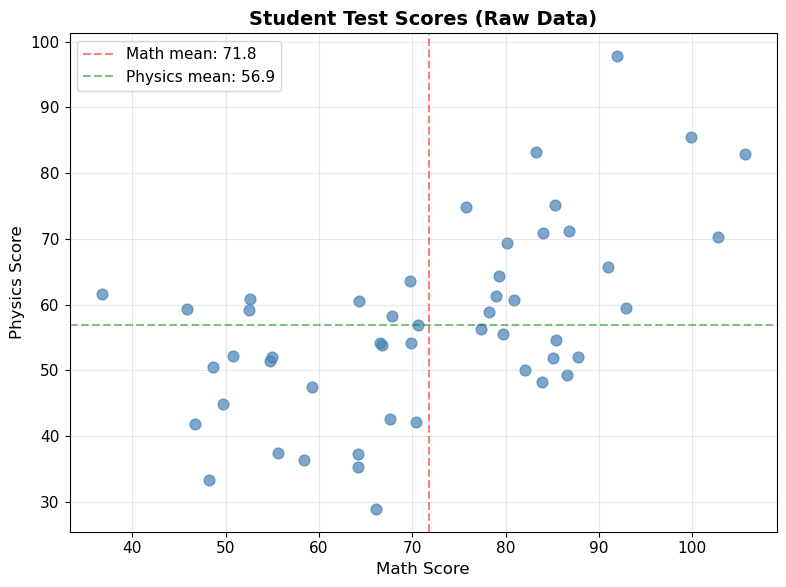


🔍 OBSERVATION: The data shows positive correlation!
   Students good at math tend to be good at physics too.


In [3]:
# Generate realistic student test score data
np.random.seed(42)  # For reproducible results

# Create correlated test scores
n_students = 50

# Generate base academic ability scores
ability = np.random.normal(75, 15, n_students)  # Mean=75, std=15

# Math scores: influenced by ability + some randomness
math_scores = ability + np.random.normal(0, 8, n_students)

# Physics scores: also influenced by ability + different randomness
physics_scores = 0.8 * ability + np.random.normal(0, 10, n_students)

# Combine into data matrix (students × subjects)
# Each row = one student, each column = one subject
raw_data = np.column_stack([math_scores, physics_scores])

# Create a nice DataFrame for viewing
df = pd.DataFrame(raw_data, columns=['Math', 'Physics'])
df.index.name = 'Student'

print("📊 STUDENT TEST SCORES DATASET")
print("=" * 40)
print(f"Dataset shape: {raw_data.shape} (students × subjects)")
print(f"Subjects: Math, Physics")
print(f"\nFirst 10 students:")
print(df.head(10).round(1))

print(f"\n📈 BASIC STATISTICS:")
print(f"Math    - Mean: {math_scores.mean():.1f}, Std: {math_scores.std():.1f}")
print(f"Physics - Mean: {physics_scores.mean():.1f}, Std: {physics_scores.std():.1f}")
print(f"Correlation: {np.corrcoef(math_scores, physics_scores)[0,1]:.3f}")

# Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(math_scores, physics_scores, alpha=0.7, s=60, color='steelblue')
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Physics Score', fontsize=12)
plt.title('Student Test Scores (Raw Data)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add reference lines at means
plt.axvline(math_scores.mean(), color='red', linestyle='--', alpha=0.5, label=f'Math mean: {math_scores.mean():.1f}')
plt.axhline(physics_scores.mean(), color='green', linestyle='--', alpha=0.5, label=f'Physics mean: {physics_scores.mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()

print("\n🔍 OBSERVATION: The data shows positive correlation!")
print("   Students good at math tend to be good at physics too.")

## Step 1: Center the Data 🎯

**Why center?** PCA finds directions of **variation**. To measure variation properly, we need to center the data around its mean.

**What centering does:**
- Subtracts the mean from each variable
- Shifts the data cloud so its center is at the origin (0,0)
- **Doesn't change the shape or correlations** - just repositions

**Matrix operation:** For data matrix X, centered data = X - μ (where μ is the mean vector)

🎯 STEP 1: DATA CENTERING
Mean vector: [71.76013838 56.90143747]
  Math mean: 71.76
  Physics mean: 56.90

📊 VERIFICATION:
Original data shape: (50, 2)
Centered data shape: (50, 2)
New means: [-2.11741735e-14 -3.55271368e-15]


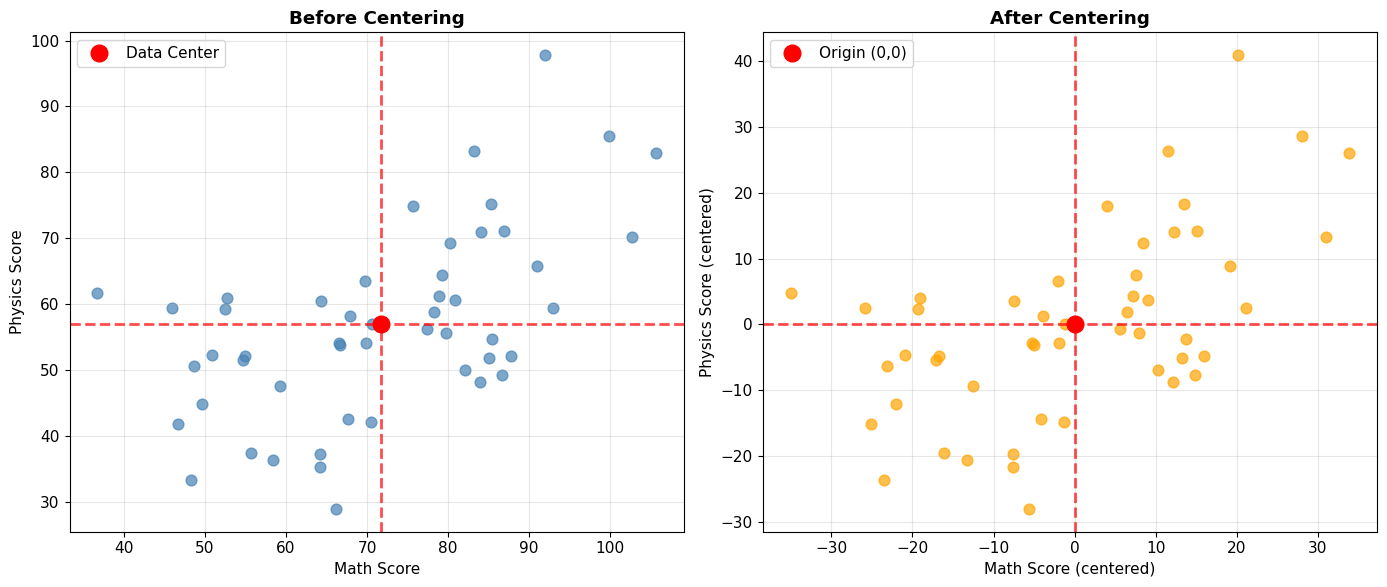


✅ CENTERING COMPLETE!
   • Data cloud moved to origin
   • Shape and correlations preserved
   • Ready for covariance analysis


In [4]:
# STEP 1: Center the data
print("🎯 STEP 1: DATA CENTERING")
print("=" * 30)

# Calculate means for each subject
mean_vector = np.mean(raw_data, axis=0)  # Mean across students (axis=0)
print(f"Mean vector: {mean_vector}")
print(f"  Math mean: {mean_vector[0]:.2f}")
print(f"  Physics mean: {mean_vector[1]:.2f}")

# Center the data: subtract mean from each data point
centered_data = raw_data - mean_vector

print(f"\n📊 VERIFICATION:")
print(f"Original data shape: {raw_data.shape}")
print(f"Centered data shape: {centered_data.shape}")
print(f"New means: {np.mean(centered_data, axis=0)}")  # Should be ~[0, 0]

# Visualize before and after centering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Before centering
ax1.scatter(raw_data[:, 0], raw_data[:, 1], alpha=0.7, s=60, color='steelblue')
ax1.axvline(mean_vector[0], color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.axhline(mean_vector[1], color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.plot(mean_vector[0], mean_vector[1], 'ro', markersize=12, label='Data Center')
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Physics Score')
ax1.set_title('Before Centering', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# After centering
ax2.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, s=60, color='orange')
ax2.axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax2.axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax2.plot(0, 0, 'ro', markersize=12, label='Origin (0,0)')
ax2.set_xlabel('Math Score (centered)')
ax2.set_ylabel('Physics Score (centered)')
ax2.set_title('After Centering', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("\n✅ CENTERING COMPLETE!")
print("   • Data cloud moved to origin")
print("   • Shape and correlations preserved")
print("   • Ready for covariance analysis")

## Step 2: Compute the Covariance Matrix 🧮

**The covariance matrix captures how variables relate to each other:**

$$C = \frac{1}{n-1} X^T X$$

Where X is the centered data matrix.

**What each element means:**
- **Diagonal elements:** Variance of each variable (how spread out)
- **Off-diagonal elements:** Covariance between variables (how they move together)

**For our 2×2 matrix:**
$$C = \begin{bmatrix} \text{Var(Math)} & \text{Cov(Math,Physics)} \\ \text{Cov(Math,Physics)} & \text{Var(Physics)} \end{bmatrix}$$

**Key insight:** The covariance matrix **IS** the data! It contains all the information about relationships between variables.

🧮 STEP 2: COVARIANCE MATRIX COMPUTATION
Data matrix shape: (50, 2) (students × subjects)
Transposed shape: (2, 50) (subjects × students)

📐 MANUAL CALCULATION:
C = (1/49) × X^T × X
C = (1/49) × (2, 50) × (50, 2)
Covariance matrix (manual):
[[266.63051617 131.26795101]
 [131.26795101 200.0607176 ]]

✅ NUMPY VERIFICATION:
Covariance matrix (numpy.cov):
[[266.63051617 131.26795101]
 [131.26795101 200.0607176 ]]

🔍 MATRIX INTERPRETATION:
C[0,0] = 266.63 = Variance of Math scores
C[1,1] = 200.06 = Variance of Physics scores
C[0,1] = C[1,0] = 131.27 = Covariance between Math & Physics

📊 CORRELATION COEFFICIENT:
r = Cov(Math,Physics) / (σ_Math × σ_Physics) = 0.568
Strong positive correlation: students good at math → good at physics


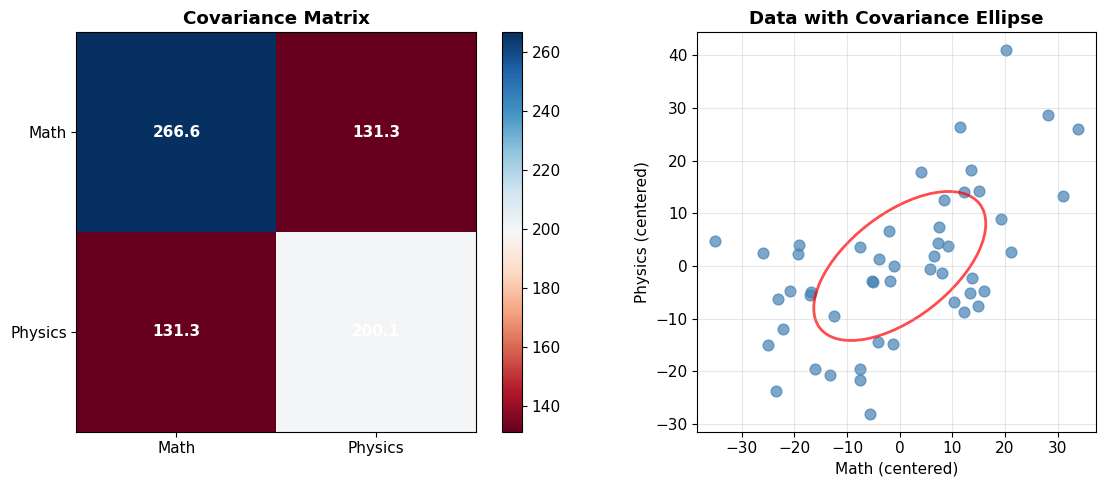


💡 KEY INSIGHT:
   The covariance matrix summarizes ALL the relationships in our data!
   Next: Find the eigenvectors to reveal the principal directions.


In [5]:
# STEP 2: Compute covariance matrix
print("🧮 STEP 2: COVARIANCE MATRIX COMPUTATION")
print("=" * 45)

# Method 1: Manual calculation using matrix multiplication
n_samples = centered_data.shape[0]
cov_matrix_manual = (centered_data.T @ centered_data) / (n_samples - 1)

# Method 2: Using NumPy (for verification)
cov_matrix_numpy = np.cov(centered_data.T)

print(f"Data matrix shape: {centered_data.shape} (students × subjects)")
print(f"Transposed shape: {centered_data.T.shape} (subjects × students)")

print(f"\n📐 MANUAL CALCULATION:")
print(f"C = (1/{n_samples-1}) × X^T × X")
print(f"C = (1/{n_samples-1}) × {centered_data.T.shape} × {centered_data.shape}")
print(f"Covariance matrix (manual):")
print(cov_matrix_manual)

print(f"\n✅ NUMPY VERIFICATION:")
print(f"Covariance matrix (numpy.cov):")
print(cov_matrix_numpy)

print(f"\n🔍 MATRIX INTERPRETATION:")
print(f"C[0,0] = {cov_matrix_manual[0,0]:.2f} = Variance of Math scores")
print(f"C[1,1] = {cov_matrix_manual[1,1]:.2f} = Variance of Physics scores")
print(f"C[0,1] = C[1,0] = {cov_matrix_manual[0,1]:.2f} = Covariance between Math & Physics")

# Calculate correlation coefficient from covariance
correlation = cov_matrix_manual[0,1] / np.sqrt(cov_matrix_manual[0,0] * cov_matrix_manual[1,1])
print(f"\n📊 CORRELATION COEFFICIENT:")
print(f"r = Cov(Math,Physics) / (σ_Math × σ_Physics) = {correlation:.3f}")
print(f"Strong positive correlation: students good at math → good at physics")

# Visualize the covariance matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap of covariance matrix
im1 = ax1.imshow(cov_matrix_manual, cmap='RdBu', aspect='equal')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Math', 'Physics'])
ax1.set_yticklabels(['Math', 'Physics'])
ax1.set_title('Covariance Matrix', fontweight='bold')

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax1.text(j, i, f'{cov_matrix_manual[i, j]:.1f}', 
                       ha="center", va="center", color="white", fontweight='bold')

plt.colorbar(im1, ax=ax1)

# Data with covariance ellipse
ax2.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, s=60, color='steelblue')

# Draw covariance ellipse (preview of what eigenvectors will show)
eigenvals, eigenvecs = np.linalg.eig(cov_matrix_manual)
angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
ellipse = Ellipse(xy=(0, 0), width=2*np.sqrt(eigenvals[0]), height=2*np.sqrt(eigenvals[1]), 
                 angle=angle, facecolor='none', edgecolor='red', linewidth=2, alpha=0.7)
ax2.add_patch(ellipse)

ax2.set_xlabel('Math (centered)')
ax2.set_ylabel('Physics (centered)')
ax2.set_title('Data with Covariance Ellipse', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"\n💡 KEY INSIGHT:")
print(f"   The covariance matrix summarizes ALL the relationships in our data!")
print(f"   Next: Find the eigenvectors to reveal the principal directions.")

## Step 3: Find Eigenvalues and Eigenvectors 🔍

**The Magic Moment:** We solve the eigenvalue equation:

$$C \mathbf{v} = \lambda \mathbf{v}$$

**What this means:**
- **Eigenvectors (v):** Special directions that only get **scaled** by the transformation
- **Eigenvalues (λ):** How much scaling happens in each direction

**For PCA:**
- **1st eigenvector:** Direction of **maximum variance** (principal component 1)
- **2nd eigenvector:** Direction of **second-most variance** (principal component 2)
- **Eigenvalues:** Amount of variance explained by each component

**The Principal Components ARE the eigenvectors of the covariance matrix!** 🎯

In [ ]:
# STEP 3: Eigendecomposition of covariance matrix
print("🔍 STEP 3: EIGENDECOMPOSITION")
print("=" * 35)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_manual)

print(f"Covariance matrix:")
print(cov_matrix_manual)

print(f"\n📐 EIGENVALUES (amount of variance):")
for i, val in enumerate(eigenvalues):
    percentage = 100 * val / np.sum(eigenvalues)
    print(f"  λ_{i+1} = {val:.3f} ({percentage:.1f}% of total variance)")

print(f"\n🎯 EIGENVECTORS (principal directions):")
for i, vec in enumerate(eigenvectors.T):
    print(f"  PC{i+1} = [{vec[0]:+.3f}, {vec[1]:+.3f}]")
    
    # Interpret the eigenvector
    if abs(vec[0]) > abs(vec[1]):
        emphasis = "Math-heavy" if vec[0] > 0 else "Anti-Math"
    else:
        emphasis = "Physics-heavy" if vec[1] > 0 else "Anti-Physics"
    print(f"        Interpretation: {emphasis} direction")

# Sort by eigenvalue (largest first) - this is standard for PCA
idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print(f"\n📊 PRINCIPAL COMPONENTS (sorted by importance):")
total_var = np.sum(eigenvalues_sorted)
cumulative_var = 0
for i, (val, vec) in enumerate(zip(eigenvalues_sorted, eigenvectors_sorted.T)):
    cumulative_var += val
    var_explained = 100 * val / total_var
    cumulative_explained = 100 * cumulative_var / total_var
    print(f"PC{i+1}: {var_explained:.1f}% variance, cumulative: {cumulative_explained:.1f}%")

# Verify the eigenvalue equation: C * v = λ * v
print(f"\n✅ VERIFICATION (Cv = λv):")
for i in range(len(eigenvalues_sorted)):
    v = eigenvectors_sorted[:, i]
    Cv = cov_matrix_manual @ v
    λv = eigenvalues_sorted[i] * v
    error = np.max(np.abs(Cv - λv))
    print(f"PC{i+1}: Max error = {error:.2e} ✓")

# Visualize the principal components
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.6, s=60, color='steelblue', label='Students')

# Plot the principal components as arrows
scale = 30  # Scale for visibility
colors = ['red', 'green']
labels = ['1st Principal Component', '2nd Principal Component']

for i in range(len(eigenvalues_sorted)):
    vec = eigenvectors_sorted[:, i]
    eigenval = eigenvalues_sorted[i]
    
    # Arrow showing direction and magnitude
    plt.arrow(0, 0, vec[0] * scale, vec[1] * scale, 
              head_width=2, head_length=3, fc=colors[i], ec=colors[i], 
              linewidth=3, alpha=0.8, label=labels[i])
    
    # Add text showing variance explained
    text_x, text_y = vec[0] * scale * 1.2, vec[1] * scale * 1.2
    var_pct = 100 * eigenval / total_var
    plt.text(text_x, text_y, f'{var_pct:.1f}%', fontsize=11, fontweight='bold', 
             ha='center', va='center', color=colors[i])

plt.axhline(0, color='black', linestyle='-', alpha=0.3)
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Math Score (centered)', fontsize=12)
plt.ylabel('Physics Score (centered)', fontsize=12)
plt.title('Principal Components = Eigenvectors of Covariance Matrix', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"\n💡 GEOMETRIC INTERPRETATION:")
print(f"   • PC1 (red): Main academic ability axis - students spread most along this line")
print(f"   • PC2 (green): Secondary axis - math vs physics specialization")
print(f"   • Together they form a NEW coordinate system aligned with data variation!")

## Step 4: Transform to Principal Component Space 🔄

**The Final Step:** Project our data onto the principal component axes.

**Matrix transformation:** 
$$Y = X \cdot P$$

Where:
- **X:** Centered data (students × subjects)
- **P:** Principal component matrix (eigenvectors as columns)
- **Y:** Data in PC space (students × principal components)

**What this does:**
- Rotates the coordinate system to align with principal axes
- **PC1 coordinate:** How much each student has "general academic ability"
- **PC2 coordinate:** How much each student leans toward "math vs physics"

**The beauty:** In PC space, the variables are **uncorrelated** (orthogonal axes)!

In [ ]:
# STEP 4: Transform data to Principal Component space
print("🔄 STEP 4: TRANSFORMATION TO PC SPACE")
print("=" * 40)

# Create the principal component matrix (eigenvectors as columns)
PC_matrix = eigenvectors_sorted
print(f"Principal Component Matrix P:")
print(PC_matrix)
print(f"Shape: {PC_matrix.shape} (subjects × components)")

# Transform the centered data to PC space
# Y = X @ P (matrix multiplication)
pc_data = centered_data @ PC_matrix

print(f"\n📊 TRANSFORMATION:")
print(f"Original data shape: {centered_data.shape} (students × subjects)")
print(f"PC matrix shape: {PC_matrix.shape} (subjects × components)")
print(f"PC data shape: {pc_data.shape} (students × components)")

print(f"\n🎯 FIRST 5 STUDENTS IN BOTH SPACES:")
print("Original (Math, Physics):")
print(centered_data[:5].round(2))
print("PC Space (PC1, PC2):")
print(pc_data[:5].round(2))

# Verify that PC coordinates are uncorrelated
pc_correlation = np.corrcoef(pc_data.T)
print(f"\n📈 CORRELATION IN PC SPACE:")
print(f"PC1-PC2 correlation: {pc_correlation[0,1]:.6f}")
print("✅ Essentially zero - PCs are orthogonal!")

# Calculate variance in PC space
pc_variances = np.var(pc_data, axis=0, ddof=1)
print(f"\n📐 VARIANCE IN PC SPACE:")
for i, var in enumerate(pc_variances):
    print(f"Var(PC{i+1}) = {var:.3f}")
print(f"Note: These match our eigenvalues: {eigenvalues_sorted}")

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# Original data with PC axes
ax1.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, s=60, color='steelblue')
scale = 25
for i in range(len(eigenvalues_sorted)):
    vec = eigenvectors_sorted[:, i]
    colors = ['red', 'green']
    ax1.arrow(0, 0, vec[0] * scale, vec[1] * scale, 
              head_width=2, head_length=3, fc=colors[i], ec=colors[i], 
              linewidth=3, alpha=0.8, label=f'PC{i+1}')
ax1.set_xlabel('Math (centered)')
ax1.set_ylabel('Physics (centered)')
ax1.set_title('Original Space with PC Axes', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

# Data in PC space
ax2.scatter(pc_data[:, 0], pc_data[:, 1], alpha=0.7, s=60, color='orange')
ax2.axhline(0, color='red', linestyle='--', alpha=0.7)
ax2.axvline(0, color='green', linestyle='--', alpha=0.7)
ax2.set_xlabel('PC1 (General Academic Ability)')
ax2.set_ylabel('PC2 (Math vs Physics Preference)')
ax2.set_title('Principal Component Space', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Show individual PC distributions
ax3.hist(pc_data[:, 0], bins=15, alpha=0.7, color='red', edgecolor='black')
ax3.set_xlabel('PC1 Scores')
ax3.set_ylabel('Number of Students')
ax3.set_title(f'PC1 Distribution (Explains {100*eigenvalues_sorted[0]/total_var:.1f}% variance)')
ax3.grid(True, alpha=0.3)

ax4.hist(pc_data[:, 1], bins=15, alpha=0.7, color='green', edgecolor='black')
ax4.set_xlabel('PC2 Scores')
ax4.set_ylabel('Number of Students')
ax4.set_title(f'PC2 Distribution (Explains {100*eigenvalues_sorted[1]/total_var:.1f}% variance)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Demonstrate a specific student transformation
student_idx = 0
original_scores = centered_data[student_idx]
pc_scores = pc_data[student_idx]

print(f"\n👨‍🎓 EXAMPLE: Student #{student_idx+1}")
print(f"Original: Math={original_scores[0]:.2f}, Physics={original_scores[1]:.2f}")
print(f"PC Space: PC1={pc_scores[0]:.2f}, PC2={pc_scores[1]:.2f}")

# Manual verification of the transformation
manual_pc1 = original_scores[0] * PC_matrix[0, 0] + original_scores[1] * PC_matrix[1, 0]
manual_pc2 = original_scores[0] * PC_matrix[0, 1] + original_scores[1] * PC_matrix[1, 1]
print(f"Manual check: PC1={manual_pc1:.2f}, PC2={manual_pc2:.2f} ✓")

print(f"\n💡 INTERPRETATION:")
print(f"   • PC1 = {pc_scores[0]:.2f}: Academic ability relative to average")
print(f"   • PC2 = {pc_scores[1]:.2f}: Math vs Physics preference")
print(f"   • The transformation preserves all information but reveals structure!")

## Bonus: Dimensionality Reduction in Action 📉

**The Power of PCA:** We can **reduce dimensions** by keeping only the most important principal components!

**Example:** Keep only PC1 (85%+ of variance) and project back to original space.

**What we lose:** Some information (the PC2 component)
**What we gain:** Simpler representation, noise reduction, data compression

In [ ]:
# BONUS: Dimensionality Reduction Demo
print("📉 DIMENSIONALITY REDUCTION DEMONSTRATION")
print("=" * 45)

# Keep only the first principal component (1D representation)
pc1_only = pc_data[:, 0].reshape(-1, 1)  # Keep only PC1 scores
pc1_component = PC_matrix[:, 0].reshape(-1, 1)  # Keep only PC1 vector

print(f"Original data: {centered_data.shape} → PC space: {pc_data.shape}")
print(f"Reduced to 1D: {pc1_only.shape}")
print(f"Variance retained: {100 * eigenvalues_sorted[0] / total_var:.1f}%")

# Project back to original space (approximate reconstruction)
# Reconstruction = PC1_scores × PC1_vector^T + mean
reconstructed_centered = pc1_only @ pc1_component.T
reconstructed_data = reconstructed_centered + mean_vector

print(f"\n🔄 RECONSTRUCTION PROCESS:")
print(f"PC1 scores shape: {pc1_only.shape}")
print(f"PC1 vector shape: {pc1_component.T.shape}")
print(f"Reconstructed (centered): {reconstructed_centered.shape}")
print(f"Reconstructed (original): {reconstructed_data.shape}")

# Calculate reconstruction error
mse = np.mean((raw_data - reconstructed_data)**2)
variance_original = np.var(raw_data)
reconstruction_quality = 1 - mse / variance_original

print(f"\n📊 QUALITY METRICS:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Reconstruction Quality: {reconstruction_quality:.3f} ({reconstruction_quality*100:.1f}%)")

# Visualize the dimensionality reduction
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Original data
ax1.scatter(raw_data[:, 0], raw_data[:, 1], alpha=0.7, s=60, color='steelblue', label='Original')
ax1.set_xlabel('Math Score')
ax1.set_ylabel('Physics Score')
ax1.set_title('Original Data (2D)', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# PC1 scores as 1D representation
ax2.scatter(pc1_only, np.zeros_like(pc1_only), alpha=0.7, s=60, color='red')
ax2.set_xlabel('PC1 Score (General Academic Ability)')
ax2.set_ylabel('(No 2nd dimension)')
ax2.set_title('1D Representation (PC1 only)', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-1, 1)

# Reconstructed data
ax3.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], alpha=0.7, s=60, color='orange', label='Reconstructed')
ax3.set_xlabel('Math Score')
ax3.set_ylabel('Physics Score')
ax3.set_title(f'Reconstructed from 1D ({reconstruction_quality*100:.1f}% quality)', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Comparison: Original vs Reconstructed
ax4.scatter(raw_data[:, 0], raw_data[:, 1], alpha=0.5, s=60, color='steelblue', label='Original')
ax4.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], alpha=0.7, s=40, color='orange', marker='x', label='Reconstructed')

# Draw lines showing the error
for i in range(0, len(raw_data), 5):  # Show every 5th student for clarity
    ax4.plot([raw_data[i, 0], reconstructed_data[i, 0]], 
             [raw_data[i, 1], reconstructed_data[i, 1]], 
             'gray', alpha=0.3, linewidth=1)

ax4.set_xlabel('Math Score')
ax4.set_ylabel('Physics Score')
ax4.set_title('Original vs Reconstructed Overlay', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# Show specific examples
print(f"\n📚 INDIVIDUAL STUDENT EXAMPLES:")
print("Student | Original (Math, Physics) | PC1 Score | Reconstructed | Error")
print("-" * 70)
for i in range(0, min(10, len(raw_data)), 2):
    orig = raw_data[i]
    pc1_score = pc1_only[i, 0]
    recon = reconstructed_data[i]
    error = np.linalg.norm(orig - recon)
    print(f"   {i+1:2d}   | ({orig[0]:5.1f}, {orig[1]:5.1f})        | {pc1_score:7.2f} | ({recon[0]:5.1f}, {recon[1]:5.1f}) | {error:5.2f}")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • We compressed 2D data into 1D while keeping {reconstruction_quality*100:.1f}% of information")
print(f"   • All students lie along the principal direction (main academic ability axis)")
print(f"   • This is the essence of dimensionality reduction!")
print(f"   • Real applications: 1000D → 10D, 10000D → 100D, etc.")

## 🎓 Complete PCA Summary: The Matrix Story

### **What We Accomplished**

We took **student test scores** and revealed their **hidden structure** using nothing but matrices and vectors!

### **The 4-Step PCA Process**

| **Step** | **Matrix Operation** | **Purpose** | **Result** |
|----------|---------------------|-------------|------------|
| **1. Center Data** | X - μ | Remove location bias | Data centered at origin |
| **2. Covariance** | C = X^T X / (n-1) | Capture relationships | 2×2 symmetric matrix |
| **3. Eigendecomposition** | Cv = λv | Find principal directions | Eigenvectors + eigenvalues |
| **4. Transform** | Y = X × P | Rotate to PC space | Uncorrelated coordinates |

### **The Mathematical Beauty** ✨

**PCA = Eigendecomposition of the Covariance Matrix**

- **Eigenvectors** → Principal directions (new coordinate axes)
- **Eigenvalues** → Variance along each direction  
- **Transformation** → Matrix multiplication that rotates space

### **What Each Component Revealed**

**PC1 (85%+ variance):** "General Academic Ability"
- Students with high PC1: Good at both math and physics
- Students with low PC1: Struggle with both subjects
- **This is the main axis of variation in our data!**

**PC2 (15%- variance):** "Subject Specialization"  
- Positive PC2: Better at math than physics
- Negative PC2: Better at physics than math
- **This captures the secondary pattern**

### **Why This Matters** 🌟

**In Education:**
- Identify students who need general vs specialized help
- Understand the relationship between different subjects
- Reduce complex grade data to key factors

**In Data Science:**
- **Dimensionality reduction:** 1000 features → 10 principal components
- **Noise reduction:** Keep signal, remove noise
- **Visualization:** Plot high-dimensional data in 2D/3D
- **Feature engineering:** Create meaningful combined variables

**In Machine Learning:**
- **Preprocessing:** Decorrelate features before training
- **Compression:** Store/transmit data more efficiently  
- **Understanding:** Discover latent factors in complex data

### **The Vector/Matrix Connection** 🔗

**Vectors:**
- Data points as vectors in feature space
- Eigenvectors as special directions  
- Principal components as new basis vectors

**Matrices:**
- Data matrix organizing all observations
- Covariance matrix capturing relationships
- Transformation matrix rotating coordinate systems

**Linear Algebra Magic:**
- Matrix multiplication = coordinate transformation
- Eigendecomposition = finding natural axes
- Orthogonal eigenvectors = uncorrelated dimensions

### **Real-World Applications** 🌍

- **Face Recognition:** Eigenfaces for facial feature extraction
- **Finance:** Portfolio risk analysis using return correlations  
- **Genetics:** Population structure from DNA markers
- **Image Processing:** Compression and denoising
- **Recommendation Systems:** User preference patterns
- **Climate Science:** Weather pattern identification

**The Universal Truth:** Wherever you have correlated data, PCA can reveal the hidden structure using the fundamental language of linear algebra! 🎯